# The Qubit

A qubit is represented by $ |\psi\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$, where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^{2} + |\beta|^{2} = 1$.

In Python, the vector is a list of complex numbers.

We may extract the state of a qubit after running it using the **statevector_simulator** in _Qiskit_

In [135]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_bloch_multivector

In [136]:
# The following code is for nicer display of the qubits
from IPython.display import display, Markdown

def format_float(x):
    if x % 1 == 0:
        return int(x)
    else:
        return x

def format_imaginary(z):
    if abs(z.imag) < 1e-15:
        return "{}".format(format_float(z.real))
    elif abs(z.real) < 1e-15:
        return "{}i".format(format_float(z.imag))
    if z.imag > 0:
        return "{} + {}i".format(z.real, abs(z.imag))
    else:
        return "{} - {}i".format(z.real, abs(z.imag))

def display_qubit(state_vector):
    alpha = state_vector[0]
    beta = state_vector[1]
    cof_0 = format_imaginary(alpha)
    cof_1 = format_imaginary(beta)
    ans = r"$|\psi\rangle = \begin{{bmatrix}} {} \\ {}\end{{bmatrix}}$".format(cof_0, cof_1)
    return ans

The Qiskit simulators are available in the _Aer_ module. For this notebook, we will explore mostly the **statevector_simulator** because we are interested in the state of the qubit.

In [137]:
simulator = Aer.get_backend("statevector_simulator")

By default, all qubits in the circuit start as $|0\rangle$. We can verify it by using an empty circuit. In the snippet below, we execute an empty circuit and verify that it is $\begin{bmatrix}1 \\ 0\end{bmatrix}$.

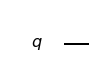

In [138]:
circuit = QuantumCircuit(1)
circuit.draw(output="mpl")

In [139]:
job = execute(circuit, backend=simulator)
result = job.result()
state_vector = result.get_statevector()
print(
    "State vector: {}\nState vector is [1, 0]? {}".format(
        state_vector, (state_vector == [1, 0])[0]
    )
)

State vector: [1.+0.j 0.+0.j]
State vector is [1, 0]? True


To modify the qubit, we need to apply gates. The $X$ gate is the gate that allows us to get $|1\rangle$, as we can see in the snippet that follows.

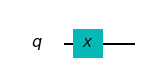

In [140]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.draw(output="mpl")

In [141]:
state_vector = execute(circuit, backend=simulator).result().get_statevector()
display(
    Markdown(
        display_qubit(state_vector)
    )
)

$|\psi\rangle = \begin{bmatrix} 0 \\ 1\end{bmatrix}$

We may apply many gates to a circuit. In the circuit below, we go from $|0\rangle$ to $|1\rangle$ and then $|-\rangle$. Notice that $H$ is frequently used to generate supperpositions.

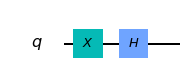

In [142]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.h(0)
circuit.draw(output="mpl")

In [143]:
state_vector = execute(circuit, backend=simulator).result().get_statevector()
display(
    Markdown(
        display_qubit(state_vector)
    )
)

$|\psi\rangle = \begin{bmatrix} 0.7071067811865475 \\ -0.7071067811865476\end{bmatrix}$

On a relevant note, different gates may lead to the same qubit!

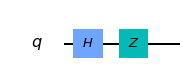

In [144]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.z(0)
circuit.draw(output="mpl")

In [145]:
state_vector = execute(circuit, backend=simulator).result().get_statevector()
display(
    Markdown(
        display_qubit(state_vector)
    )
)

$|\psi\rangle = \begin{bmatrix} 0.7071067811865476 \\ -0.7071067811865475\end{bmatrix}$

And gate order matters! Matrix multiplication is not commutative in general. The qubit will be different if the same gates are applied in a different order

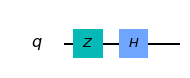

In [146]:
circuit = QuantumCircuit(1)
circuit.z(0)
circuit.h(0)
circuit.draw(output="mpl")

In [147]:
state_vector = execute(circuit, backend=simulator).result().get_statevector()
display(
    Markdown(
        display_qubit(state_vector)
    )
)

$|\psi\rangle = \begin{bmatrix} 0.7071067811865476 \\ 0.7071067811865475\end{bmatrix}$

It is important to recall that $\alpha, \beta \in \mathbb{C}$. The following circuit originates a state where the coefficient are not in $\mathbb{R}$.

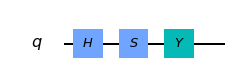

In [148]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.y(0)
circuit.draw(output="mpl")

In [149]:
state_vector = execute(circuit, backend=simulator).result().get_statevector()
display(
    Markdown(
        display_qubit(state_vector)
    )
)

$|\psi\rangle = \begin{bmatrix} 0.7071067811865475 \\ 0.7071067811865476i\end{bmatrix}$

Also, last note: because the coefficients are complex numbers, it is important to write $|\alpha|^{2} + |\beta|^{2} = 1$ and not $\alpha^{2} + \beta^{2} = 1$. $\alpha^2$ might not even be a real number!

In [150]:
print(
    "Incorrect: alpha^2 + beta^2 = {}".format(
        state_vector[0]**2 + state_vector[1]**2
    )
)
print(
    "Correct: |alpha|^2 + |beta|^2 = {}".format(
        abs(state_vector[0]**2) + abs(state_vector[1]**2)
    )
)

Incorrect: alpha^2 + beta^2 = (-2.220446049250313e-16+0j)
Correct: |alpha|^2 + |beta|^2 = 1.0


A cool fact about qubits is: they can be visualized as 3d vectors in a unitary sphere!
We won't go deep into how the representation is made (it has to do with $X$, $Y$, and $Z$ basis). But you can see it using **plot_bloch_multivector** that is in _qiskit.visualization_

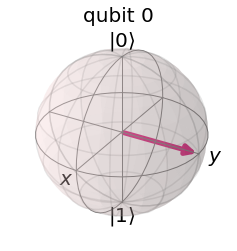

In [151]:
plot_bloch_multivector(state_vector)